In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_resnet50.p to train_resnet50.p
Saving valid_resnet50.p to valid_resnet50.p


In [2]:
import numpy as np
import pickle
import keras.utils as utils
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

Using TensorFlow backend.


# Training a NN Classifier on top of ResNet50

The general idea here is to use transfer learning approach. Inputs to the model are image representations in the form of vectors of length 2048, which are obtained after propagating images through a ResNet50 model pretrained on Imagenet and taking the outputs of its last layer before classification.

Using these features we'll now try to classify the images into two classes: "good" cars and "damaged" cars with a Neural Network, which is built on top of cut ResNet50. First, we try a single layer with two outputs and softmax activation. Second, we try a NN with several hidden layers.

In [0]:
def plot_training_history(training_history, epochs_num):
  plt.subplot(211)
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["loss"], label='train dataset')
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["val_loss"], label='validation dataset')
  plt.title('Loss plot')
  plt.xlabel('epoch')
  plt.ylabel('cross entropy')
  plt.legend()
  plt.show()
  plt.subplot(212)
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["acc"], label='train dataset')
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["val_acc"], label='validation dataset')
  plt.title('Accuracy plot')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [0]:
def display_metrics(true_labels, predicted_labels, labels):
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("\nConfusion matrix")
    display(DataFrame(confusion_matrix(true_labels, predicted_labels),
                      index=["Actual " + label for label in labels], columns=["Predicted " + label for label in labels]))
    print("\nPrecision, recall, F-score, support")
    display(DataFrame(np.array(precision_recall_fscore_support(true_labels, predicted_labels)),
            index=("precision", "recall", "F-score", "support"), columns=labels))

In [0]:
train_cars, train_labels = pickle.loads(uploaded['train_resnet50.p'])
input_shape = train_cars[0].shape
valid_cars, valid_labels = pickle.loads(uploaded['valid_resnet50.p'])

In [0]:
train_labels_probabilities = utils.to_categorical(train_labels)
valid_labels_probabilities = utils.to_categorical(valid_labels)

## Single layer

First let's try to train a softmax linear classifier.

In [0]:
x = Input(shape=(input_shape))
y = Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)
single_layer_model = Model(x, y)
single_layer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 4,098
Trainable params: 4,098
Non-trainable params: 0
_________________________________________________________________


In [18]:
training_history = single_layer_model.fit(train_cars, train_labels_probabilities, batch_size=128, epochs=50, validation_data=(valid_cars, valid_labels_probabilities))

Train on 6514 samples, validate on 814 samples
Epoch 1/50
6514/6514 [==============================] - 0s 69us/step - loss: 0.6253 - acc: 0.6802 - val_loss: 0.5222 - val_acc: 0.8034
Epoch 2/50
6514/6514 [==============================] - 0s 40us/step - loss: 0.4981 - acc: 0.7981 - val_loss: 0.4595 - val_acc: 0.8206
Epoch 3/50
6514/6514 [==============================] - 0s 40us/step - loss: 0.4614 - acc: 0.8213 - val_loss: 0.4302 - val_acc: 0.8342
Epoch 4/50
6514/6514 [==============================] - 0s 41us/step - loss: 0.4447 - acc: 0.8276 - val_loss: 0.4173 - val_acc: 0.8317
Epoch 5/50
6514/6514 [==============================] - 0s 40us/step - loss: 0.4299 - acc: 0.8356 - val_loss: 0.3981 - val_acc: 0.8514
Epoch 6/50
6514/6514 [==============================] - 0s 41us/step - loss: 0.4203 - acc: 0.8413 - val_loss: 0.3959 - val_acc: 0.8428
Epoch 7/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.4157 - acc: 0.8437 - val_loss: 0.3840 - val_acc: 0.8563
Epoch 8/

6514/6514 [==============================] - 0s 49us/step - loss: 0.3913 - acc: 0.8578 - val_loss: 0.3625 - val_acc: 0.8759
Epoch 15/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3899 - acc: 0.8557 - val_loss: 0.3624 - val_acc: 0.8612
Epoch 16/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3886 - acc: 0.8571 - val_loss: 0.3613 - val_acc: 0.8796
Epoch 17/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3893 - acc: 0.8545 - val_loss: 0.3574 - val_acc: 0.8808
Epoch 18/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3852 - acc: 0.8618 - val_loss: 0.3622 - val_acc: 0.8587
Epoch 19/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3843 - acc: 0.8592 - val_loss: 0.3546 - val_acc: 0.8747
Epoch 20/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3855 - acc: 0.8582 - val_loss: 0.3540 - val_acc: 0.8784
Epoch 21/50
6514/6514 [==============================] - 0s 

6514/6514 [==============================] - 0s 50us/step - loss: 0.3783 - acc: 0.8646 - val_loss: 0.3491 - val_acc: 0.8759
Epoch 28/50
6514/6514 [==============================] - 0s 47us/step - loss: 0.3772 - acc: 0.8643 - val_loss: 0.3494 - val_acc: 0.8857
Epoch 29/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3778 - acc: 0.8626 - val_loss: 0.3483 - val_acc: 0.8833
Epoch 30/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3771 - acc: 0.8664 - val_loss: 0.3480 - val_acc: 0.8857
Epoch 31/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3774 - acc: 0.8634 - val_loss: 0.3476 - val_acc: 0.8784
Epoch 32/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3785 - acc: 0.8648 - val_loss: 0.3488 - val_acc: 0.8845
Epoch 33/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3771 - acc: 0.8641 - val_loss: 0.3462 - val_acc: 0.8821
Epoch 34/50
6514/6514 [==============================] - 0s 

Epoch 41/50
6514/6514 [==============================] - 0s 47us/step - loss: 0.3776 - acc: 0.8634 - val_loss: 0.3498 - val_acc: 0.8686
Epoch 42/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3751 - acc: 0.8657 - val_loss: 0.3442 - val_acc: 0.8845
Epoch 43/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3726 - acc: 0.8669 - val_loss: 0.3463 - val_acc: 0.8833
Epoch 44/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3748 - acc: 0.8651 - val_loss: 0.3437 - val_acc: 0.8870
Epoch 45/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3736 - acc: 0.8651 - val_loss: 0.3433 - val_acc: 0.8870
Epoch 46/50
6514/6514 [==============================] - 0s 49us/step - loss: 0.3726 - acc: 0.8666 - val_loss: 0.3502 - val_acc: 0.8722
Epoch 47/50
6514/6514 [==============================] - 0s 48us/step - loss: 0.3737 - acc: 0.8669 - val_loss: 0.3431 - val_acc: 0.8870
Epoch 48/50
6514/6514 [=========================

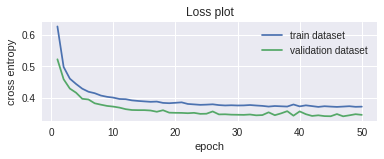

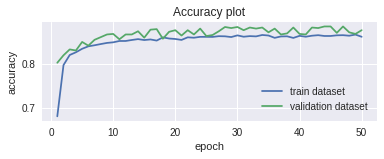

In [20]:
plot_training_history(training_history, 50)

The loss stabilises, but is still higher than for vgg-19 model.

Here is an example of predicted probabilities.

In [21]:
print(single_layer_model.predict(np.expand_dims(train_cars[0],axis=0)))

[[0.36749464 0.6325053 ]]


Let's look at the metrics on the training dataset.

In [22]:
predicted_labels = single_layer_model.predict(train_cars).argmax(axis=-1)
display_metrics(train_labels, predicted_labels, ("Good Cars", "Damaged Cars"))

Accuracy: 0.8669020571077679

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,2515,683
Actual Damaged Cars,184,3132



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.931827,0.820970
recall,0.786429,0.944511
F-score,0.852976,0.878418
support,3198.000000,3316.000000


Now for the validation dataset.

In [23]:
predicted_labels_valid = single_layer_model.predict(valid_cars).argmax(axis=-1)
display_metrics(valid_labels, predicted_labels_valid, ("Good Cars", "Damaged Cars"))

Accuracy: 0.8783783783783784

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,317,76
Actual Damaged Cars,23,398



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.932353,0.839662
recall,0.806616,0.945368
F-score,0.864939,0.889385
support,393.000000,421.000000


The results are consistent, but worse than for the model with features extracted from vgg-19.

## Multiple layers

Let's add to the model one more intermediate dense layer followed by a dropout layer for regularisation.

In [0]:
x = Input(shape=(input_shape))
z = Dense(512, activation='relu')(x)
z = Dropout(0.6)(z)
y = Dense(2, activation='softmax')(z)
multiple_layer_model = Model(x, y)
multiple_layer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
multiple_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1026      
Total params: 1,050,114
Trainable params: 1,050,114
Non-trainable params: 0
_________________________________________________________________


In [36]:
training_history = multiple_layer_model.fit(train_cars, train_labels_probabilities, batch_size=256, epochs=50, validation_data=(valid_cars, valid_labels_probabilities))

Train on 6514 samples, validate on 814 samples
Epoch 1/50
6514/6514 [==============================] - 1s 87us/step - loss: 0.6303 - acc: 0.6896 - val_loss: 0.3923 - val_acc: 0.8280
Epoch 2/50
6514/6514 [==============================] - 0s 33us/step - loss: 0.4124 - acc: 0.8135 - val_loss: 0.3381 - val_acc: 0.8501
Epoch 3/50
6514/6514 [==============================] - 0s 31us/step - loss: 0.3717 - acc: 0.8394 - val_loss: 0.3101 - val_acc: 0.8661
Epoch 4/50
6514/6514 [==============================] - 0s 31us/step - loss: 0.3473 - acc: 0.8460 - val_loss: 0.2982 - val_acc: 0.8624
Epoch 5/50
6514/6514 [==============================] - 0s 32us/step - loss: 0.3436 - acc: 0.8499 - val_loss: 0.2884 - val_acc: 0.8661
Epoch 6/50
6514/6514 [==============================] - 0s 33us/step - loss: 0.3178 - acc: 0.8640 - val_loss: 0.2698 - val_acc: 0.8870
Epoch 7/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.3087 - acc: 0.8621 - val_loss: 0.2691 - val_acc: 0.8821
Epoch 8/

6514/6514 [==============================] - 0s 36us/step - loss: 0.2526 - acc: 0.8930 - val_loss: 0.2358 - val_acc: 0.9054
Epoch 18/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.2602 - acc: 0.8896 - val_loss: 0.2406 - val_acc: 0.9029
Epoch 19/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2469 - acc: 0.8993 - val_loss: 0.2230 - val_acc: 0.9042
Epoch 20/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2516 - acc: 0.8945 - val_loss: 0.2548 - val_acc: 0.8919
Epoch 21/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2437 - acc: 0.8973 - val_loss: 0.2244 - val_acc: 0.9029
Epoch 22/50
6514/6514 [==============================] - 0s 35us/step - loss: 0.2423 - acc: 0.8981 - val_loss: 0.2368 - val_acc: 0.8907
Epoch 23/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2355 - acc: 0.9018 - val_loss: 0.2176 - val_acc: 0.9091
Epoch 24/50
6514/6514 [==============================] - 0s 

6514/6514 [==============================] - 0s 36us/step - loss: 0.2107 - acc: 0.9136 - val_loss: 0.2055 - val_acc: 0.9140
Epoch 34/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.2151 - acc: 0.9103 - val_loss: 0.2138 - val_acc: 0.8993
Epoch 35/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.2172 - acc: 0.9073 - val_loss: 0.2174 - val_acc: 0.8980
Epoch 36/50
6514/6514 [==============================] - 0s 35us/step - loss: 0.2340 - acc: 0.8987 - val_loss: 0.2156 - val_acc: 0.9152
Epoch 37/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.2159 - acc: 0.9123 - val_loss: 0.2273 - val_acc: 0.9079
Epoch 38/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2171 - acc: 0.9067 - val_loss: 0.2049 - val_acc: 0.9189
Epoch 39/50
6514/6514 [==============================] - 0s 36us/step - loss: 0.2116 - acc: 0.9108 - val_loss: 0.2086 - val_acc: 0.9140
Epoch 40/50
6514/6514 [==============================] - 0s 

6514/6514 [==============================] - 0s 35us/step - loss: 0.2003 - acc: 0.9162 - val_loss: 0.2458 - val_acc: 0.8968
Epoch 50/50
6514/6514 [==============================] - 0s 37us/step - loss: 0.2037 - acc: 0.9105 - val_loss: 0.2199 - val_acc: 0.9115


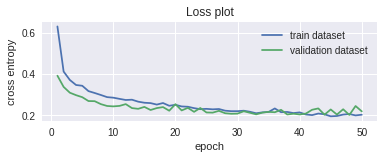

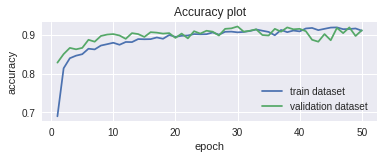

In [37]:
plot_training_history(training_history, 50)

Let's look at the metrics on the training dataset.

In [38]:
predicted_labels = multiple_layer_model.predict(train_cars).argmax(axis=-1)
display_metrics(train_labels, predicted_labels, ("Good Cars", "Damaged Cars"))

Accuracy: 0.9128031931225054

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,2689,509
Actual Damaged Cars,59,3257



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.978530,0.864843
recall,0.840838,0.982207
F-score,0.904474,0.919797
support,3198.000000,3316.000000


Now for the validation dataset.

In [39]:
predicted_labels_valid = multiple_layer_model.predict(valid_cars).argmax(axis=-1)
display_metrics(valid_labels, predicted_labels_valid, ("Good Cars", "Damaged Cars"))

Accuracy: 0.9115479115479116

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,332,61
Actual Damaged Cars,11,410



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.967930,0.870488
recall,0.844784,0.973872
F-score,0.902174,0.919283
support,393.000000,421.000000


Adding more layers has markedly improved the model camparing to the single layer case, but it still underperforms compared to analogous model with vgg-19 features.

Let's save the weights for the multiple layer model.

In [0]:
single_layer_model.save_weights('resnet50_multiple_layer_model_loss_0.2037.h5')

files.download('resnet50_multiple_layer_model_loss_0.2037.h5')